## Visualizing scikit-learn ML model classifications

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams['font.size'] = 14

### Prepare data

Load breast cancer dataset and use PCA (principal components analysis) to filter out two features with highest explained variance

In [2]:
dx = load_breast_cancer().data
dy = load_breast_cancer().target
class_names = load_breast_cancer().target_names
classes, class_num = np.unique(dy, return_counts=True)

dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx)

dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=0)

### Inspect the data

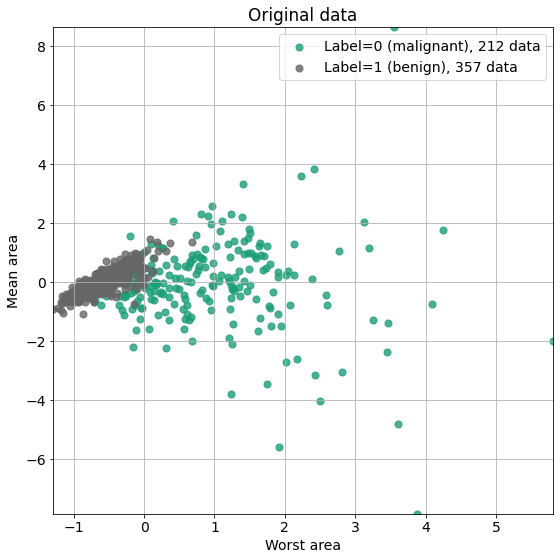

In [3]:
plt.figure(figsize=(8, 8))

plt.title('Original data')

color = [cm.Dark2.colors[0], cm.Dark2.colors[-1]]
for label in classes:
    data = dx[dy==label]
    plt.scatter(*data.T, color=color[label], s=50, alpha=0.8, label=f'Label={label} ({class_names[label]}), {class_num[label]} data')

plt.xlabel('Worst area')
plt.ylabel('Mean area')
plt.xlim([np.amin(dx.T[0]), np.amax(dx.T[0])])
plt.ylim([np.amin(dx.T[1]), np.amax(dx.T[1])])

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### KNN (K-Nearest Neighbors) prediction

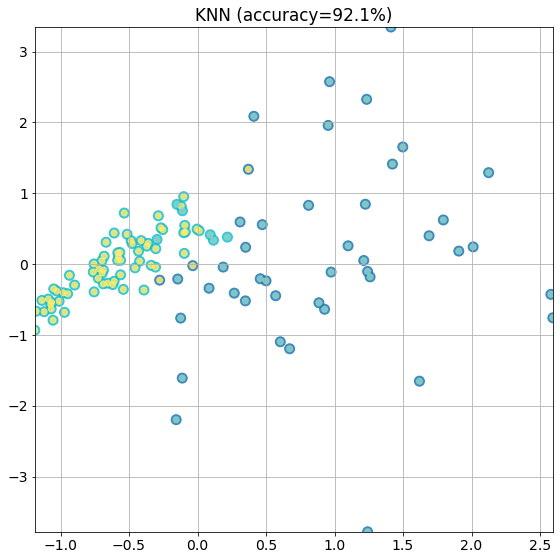

In [4]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
weights = 'uniform'
model = KNeighborsClassifier(n_neighbors=k, weights=weights)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
pred_prob = model.predict_proba(dx_test) * 100
test_score = model.score(dx_test, dy_test) * 100

plt.figure(figsize=(8, 8))
plt.title(f'KNN (accuracy={test_score:.1f}%)')

plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100, alpha=0.8)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35, alpha=0.8)

plt.xlim([np.amin(dx_test.T[0]), np.amax(dx_test.T[0])])
plt.ylim([np.amin(dx_test.T[1]), np.amax(dx_test.T[1])])
plt.grid(True)
plt.tight_layout()
plt.show()

### Demostration of looking for k-nearest neighbors in training data

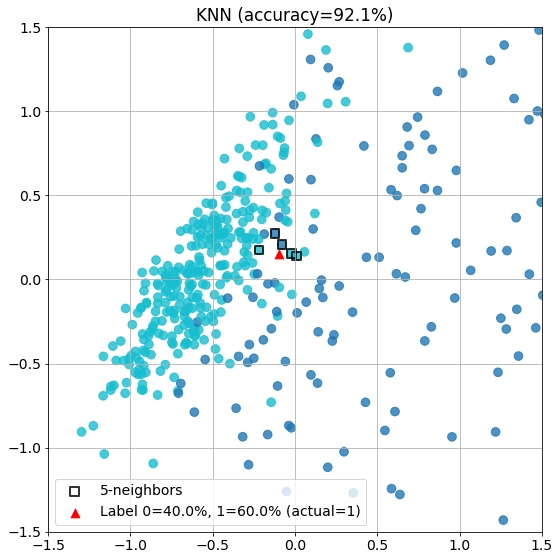

In [5]:
idx = 3
_, indices = model.kneighbors(dx_test[idx:idx+1], n_neighbors=k)

plt.figure(figsize=(8, 8))
plt.title(f'KNN (accuracy={test_score:.1f}%)')

plt.scatter(*dx_train.T, c=dy_train, cmap='tab10', s=75, alpha=0.8)
plt.scatter(*dx_train[indices][0].T, color='None', s=75, alpha=0.8, linewidth=2, edgecolors='black', marker='s', label=f'{k}-neighbors')
plt.scatter(*dx_test[idx], color='red', s=75, marker='^', label=f'Label 0={pred_prob[idx][0]:.1f}%, 1={pred_prob[idx][1]:.1f}% (actual={predict[idx]})')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Logistic Regression prediction

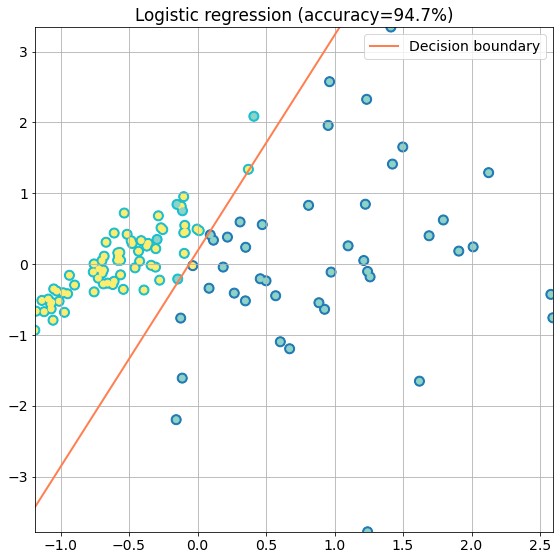

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
pred_prob = model.predict_proba(dx_test)
test_score = model.score(dx_test, dy_test) * 100

plt.figure(figsize=(8, 8))
plt.title(f'Logistic regression (accuracy={test_score:.1f}%)')

plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)

x = np.linspace(np.amin(dx_test.T[0]), np.amax(dx_test.T[0]))
y = -model.coef_[0][0] / model.coef_[0][1] * x - model.intercept_ / model.coef_[0][1]
plt.plot(x, y, color='coral', linewidth=2, label='Decision boundary')

plt.xlim([np.amin(dx_test.T[0]), np.amax(dx_test.T[0])])
plt.ylim([np.amin(dx_test.T[1]), np.amax(dx_test.T[1])])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Demostration of using logistic function for prediction

Using single-feature data

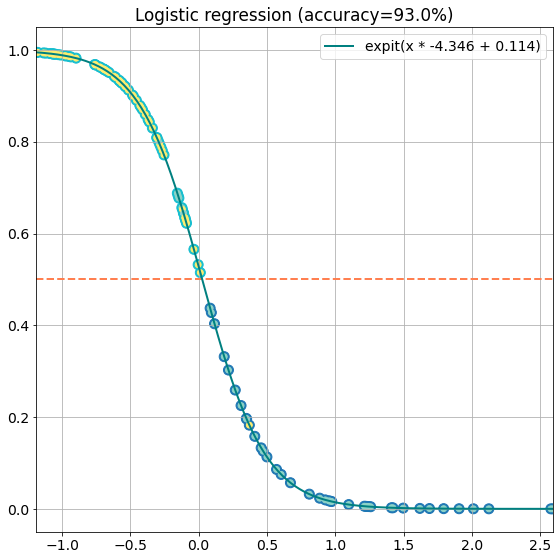

In [7]:
from scipy.special import expit

dx_1 = PCA(n_components=1).fit_transform(load_breast_cancer().data)
dx_1 = StandardScaler().fit_transform(dx_1)
dx_train_1, dx_test_1, dy_train_1, dy_test_1 = train_test_split(dx_1, dy, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(dx_train_1, dy_train_1)
predict = model.predict(dx_test_1)
pred_prob = model.predict_proba(dx_test_1)
test_score = model.score(dx_test_1, dy_test_1) * 100

plt.figure(figsize=(8, 8))
plt.title(f'Logistic regression (accuracy={test_score:.1f}%)')

x = np.linspace(np.amin(dx_train_1), np.amax(dx_train_1), num=dx_train_1.size)
y = expit(x * model.coef_[0] + model.intercept_[0])
y_t = expit(dx_test_1 * model.coef_[0] + model.intercept_[0])

plt.scatter(dx_test_1, y_t, c=predict, cmap='tab10', s=100)
plt.scatter(dx_test_1, y_t, c=dy_test_1, cmap='Set3', s=35)

plt.plot([np.amin(dx_test_1), np.amax(dx_test_1)], [0.5, 0.5], color='coral', linewidth=2, linestyle='--')
plt.plot(x, y, color='teal', linewidth=2, label=f'expit(x * {model.coef_[0][0]:.3f} + {model.intercept_[0]:.3f})')

plt.xlim([np.amin(dx_test_1), np.amax(dx_test_1)])
plt.ylim([-0.05, 1.05])
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Linear SVM (Support Vector Machine) prediction

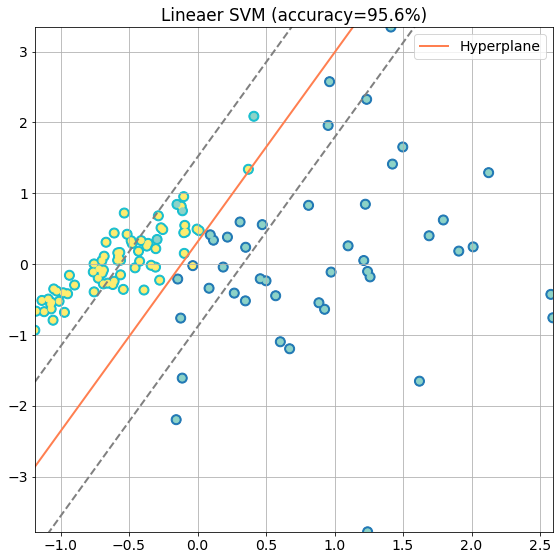

In [8]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100

plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'Lineaer SVM (accuracy={test_score:.1f}%)')

plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)

a = -model.coef_[0][0] / model.coef_[0][1]
x = np.linspace(np.amin(dx_test.T[0]), np.amax(dx_test.T[0]))
y = a * x - model.intercept_[0] / model.coef_[0][1]
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
y_down = y - np.sqrt(1 + a ** 2) * margin
y_up = y + np.sqrt(1 + a ** 2) * margin

plt.plot(x, y, color='coral', linewidth=2, label='Hyperplane')
plt.plot(x, y_down, color='grey', linewidth=2, linestyle='--')
plt.plot(x, y_up, color='grey', linewidth=2, linestyle='--')

plt.xlim([np.amin(dx_test.T[0]), np.amax(dx_test.T[0])])
plt.ylim([np.amin(dx_test.T[1]), np.amax(dx_test.T[1])])
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

### Non-linear SVM prediction

Using RBF (radial basis function)

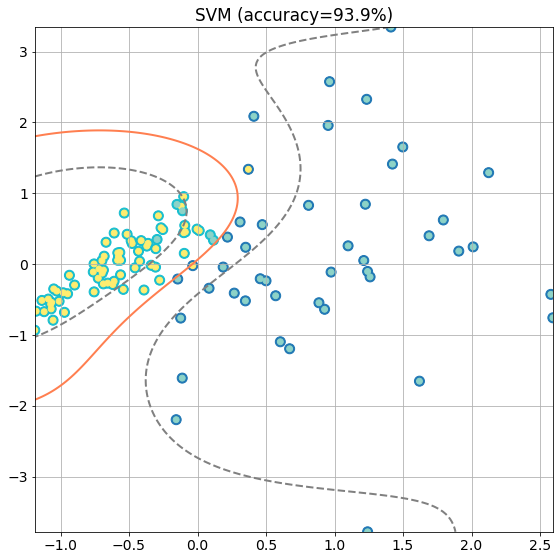

In [9]:
from sklearn.svm import SVC

kernel = 'rbf'
model = SVC(kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100

plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM (accuracy={test_score:.1f}%)')

plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)

x_min, x_max = np.amin(dx_test.T[0]), np.amax(dx_test.T[0])
y_min, y_max = np.amin(dx_test.T[1]), np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'], linestyles=['--', '-', '--'], linewidths=[2, 2, 2], levels=[-1, 0, 1])

plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.grid(True)
plt.show()

### Support vectors in training data

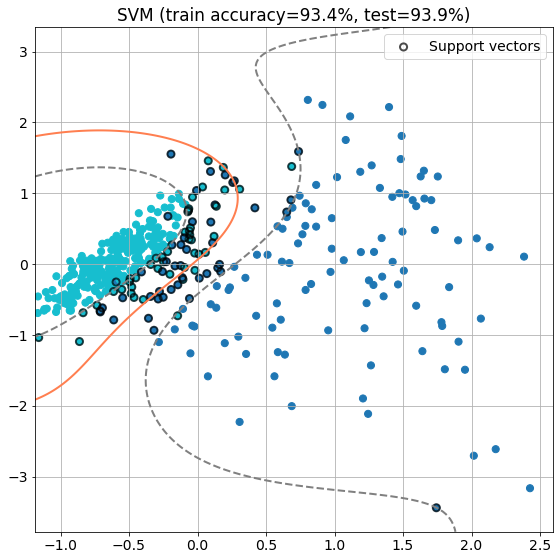

In [10]:
train_score = model.score(dx_train, dy_train) * 100

plt.figure(figsize=(8, 8))
plt.title(f'SVM (train accuracy={train_score:.1f}%, test={test_score:.1f}%)')

plt.scatter(*dx_train.T, c=dy_train, cmap='tab10', s=50)
plt.scatter(*model.support_vectors_.T, color='None', s=50, linewidth=2, edgecolor='black', alpha=0.7, label='Support vectors')

x_min, x_max = np.amin(dx_test.T[0]), np.amax(dx_test.T[0])
y_min, y_max = np.amin(dx_test.T[1]), np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'], linestyles=['--', '-', '--'], linewidths=[2, 2, 2], levels=[-1, 0, 1])

plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()